In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn import svm
from sklearn import preprocessing

In [33]:
def set_plot_attr(size_X, size_Y):
    %matplotlib inline
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (size_X, size_Y)
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.labelsize'] = 28
    plt.rcParams['axes.titlesize'] = 28
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['figure.titlesize'] = 14
    plt.rcParams['axes.linewidth'] = 1

In [34]:
def load_df(csv_name):
    global df    
    df = pd.read_csv(csv_name)
    df.ix[:, df.columns!='category'] = preprocessing.MinMaxScaler().fit_transform(df.ix[:, df.columns!='category'])
    print('Shape of the loaded data frame:', df.shape)
    print('\nFirst 5 entries:\n', df.head())

In [35]:
def train_attr(train_col, predict_col):
    global train_X, train_Y
    train_X = DataFrame()
    train_Y = DataFrame()
    train_X = df.iloc[:, train_col]
    train_Y = df.iloc[:, predict_col]

In [36]:
def pred(model_clf):
    global model
    model = model_clf
    model = model.fit(train_X, train_Y)
    print('Model score is:', model.score(train_X, train_Y))

In [68]:
def prob_plot(size, alpha, x, y):
    train_X.plot.scatter(x = x, y = y, c = model.predict_proba(train_X)[:, 0], s = size, alpha = alpha, cmap=plt.cm.magma)

In [38]:
def pred_plot(size, alpha, x, y, color):
    ax = train_X.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(model.predict(train_X)):
        train_X[model.predict(train_X) == i].plot(x = x, y = y, kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = size, alpha = alpha, ax = ax)
        count = count + 1

In [57]:
def plot_data(size, alpha, x, y, color):
    ax = train_X.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in train_Y.unique():
        train_X[df['category'] == i].plot(x = x, y = y, kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = 100, alpha = 0.5, ax = ax)
        count = count + 1

In [58]:
def mesh_make(df, x, y, z, step_size):
    
    global mesh
    mesh = DataFrame()
    x_min, x_max = train_X.iloc[:, x].min() , train_X.iloc[:, x].max() 
    y_min, y_max = train_X.iloc[:, y].min() , train_X.iloc[:, y].max() 
    z_min, z_max = train_X.iloc[:, z].min() , train_X.iloc[:, z].max() 
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size), \
                             np.arange(z_min, z_max, step_size))
    mesh['xx'] = xx.ravel()
    mesh['yy'] = yy.ravel()
    mesh['zz'] = zz.ravel()
    mesh['proba_1'] = model.predict_proba(np.c_[mesh['xx'], mesh['yy'], mesh['zz']])[:, 0]
    mesh['predicted'] = model.predict(np.c_[mesh['xx'], mesh['yy'], mesh['zz']])
    print(mesh.shape)

In [128]:
def mesh_plot(size, alpha, color):
    ax = mesh.plot(x = 0, y = 1, kind = "scatter", s = 0)

    count = 0
    for i in np.unique(mesh['predicted']):
        print(i)
        mesh[(mesh.zz == 0)][(mesh.predicted == i)].plot(x = "xx", y = "yy", kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = size, alpha = alpha, ax = ax)
        count = count + 1    
    ax.set_xlabel('alcohol')
    ax.set_ylabel('volatile acidity')

In [111]:
def plot_boundary(size, alpha, lo_bound, up_bound, border_size, color):
    ax = mesh.plot(x = 0, y = 1, kind = "scatter", s = 0)
    count = 0
    for i in np.unique(mesh['predicted']):
        mesh[mesh.zz == 0][mesh.predicted == i].plot(x = "xx", y = "yy", kind = "scatter", color = color[count],\
                                                  label = "Class " + str(i), s = size, alpha = alpha, ax = ax)
        count = count + 1
    count = 0
    loop_var = 0
    prob_no = 0
    for prob_val in mesh[mesh.zz == 0]['proba_1']:
        prob_no = 0
        for i in lo_bound:
            if (prob_val >= lo_bound[prob_no] and prob_val <= up_bound[prob_no]):
                count = count + 1
                ax.plot([mesh.iloc[loop_var]['xx']], [mesh.iloc[loop_var]['yy']],'bo', markersize = border_size)
            prob_no = prob_no + 1
        loop_var = loop_var + 1

In [112]:
#set plot size
set_plot_attr(size_X = 16, size_Y = 9) 

#load csv
load_df("./winequality-red2.csv")

Shape of the loaded data frame: (1599, 13)

First 5 entries:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.13772

In [161]:
#train data- column numbers, predict data- column number
train_attr((10, 1, 2), 12)

pred(model_clf = LogisticRegression())
#pred(model_clf = RandomForestClassifier(n_estimators=100))
#pred(model_clf = tree.DecisionTreeClassifier(max_depth = 100))
#pred(model_clf = discriminant_analysis.LinearDiscriminantAnalysis())
#pred(model_clf = discriminant_analysis.QuadraticDiscriminantAnalysis())
#pred(model_clf = svm.SVC(kernel = 'linear', probability = True))
#pred(model_clf = svm.SVC(kernel = 'rbf', probability = True))

Model score is: 0.737335834897


In [162]:
colormap = [[0.267004, 0.004874, 0.329415], [0.657642, 0.860219, 0.203082], \
           "blue", "purple", "black", "coral"]

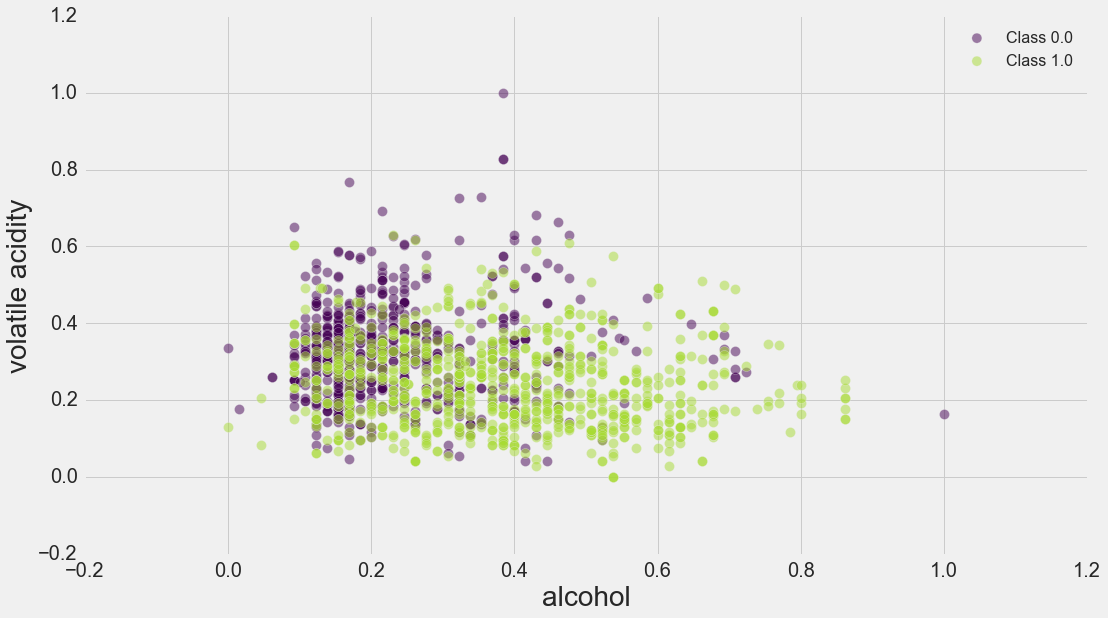

In [163]:
plot_data(size = 100, alpha = 0.5, x = 0, y = 1, color =  )

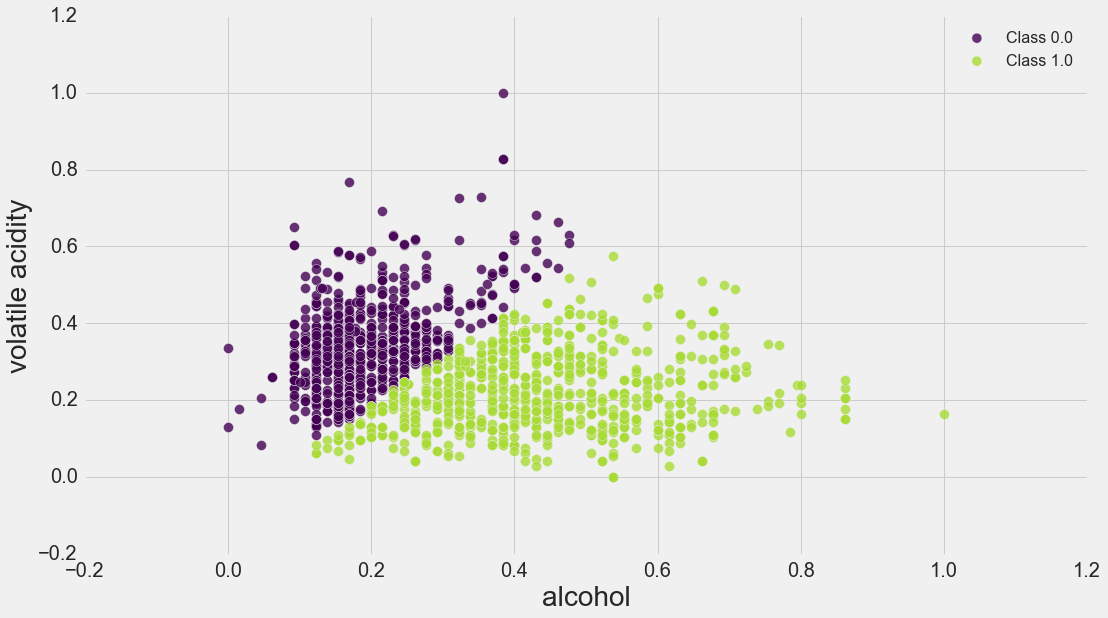

In [164]:
pred_plot(size = 100, alpha = 0.8, x = 0, y = 1, color = colormap)

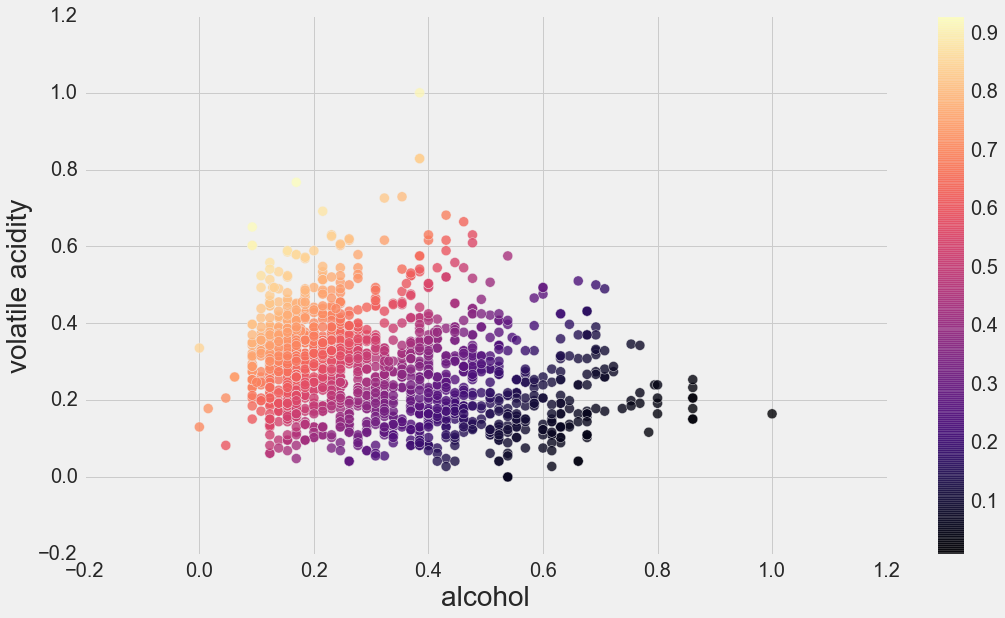

In [165]:
prob_plot(size = 100, alpha = 0.8, x = 0, y = 1)

In [166]:
mesh_make(df = train_X, x = 0, y = 1, z = 2, step_size = 0.01)

(1010000, 5)


0.0
1.0


/Users/amitkaps/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


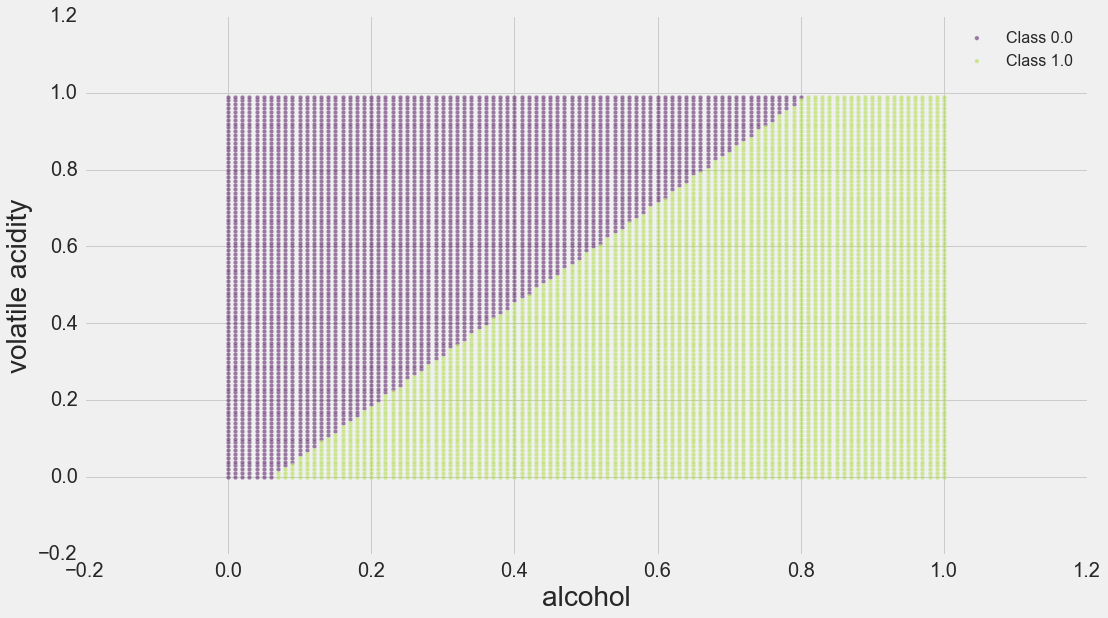

In [167]:
mesh_plot(size = 20, alpha = 0.5, color = colormap)

In [168]:
# plot_boundary(size = 20, alpha = 0.2, lo_bound = [0.49], up_bound = [0.51], border_size = 5, \
              color = colormap)

IndentationError: unexpected indent (<ipython-input-168-c3940bee864a>, line 2)

In [ ]:
# parallel_coordinates(df, 'category')